# Do these kind of analysis on the final dataset (other script) 

In [1]:
import time
import simplejson as json
import numpy as np
import copy
import matplotlib.pyplot as plt

FOLDER_DATA = '../'

# Data reading

In [2]:
# this the result of the mapping from FS sounds to ASO.
# 268k sounds with basic metadata and their corresponding ASO id.
# useful to get the duration of every sound
try:
    with open(FOLDER_DATA + 'json/FS_sounds_ASO_postIQA.json') as data_file:
        data_duration = json.load(data_file)
except:
    raise Exception('CHOOSE A MAPPING FILE AND ADD IT TO ' + FOLDER_DATA +'json/ FOLDER (THE FILE INCLUDE DURATION INFORMATION NEEDED)')

# load json with votes, to select only PP and PNP
try:
    with open(FOLDER_DATA + 'json/votes_dumped_2018_May_16.json') as data_file:
        data_votes = json.load(data_file)
except:
    raise Exception(
        'ADD THE FILE CONTAINING THE VOTES (list of dict "value", "freesound_sound_id", "node_id") AND ADD IT TO THE FOLDER ' + FOLDER_DATA + 'json/')

# load json with ids and domestic categories info
try:
    with open(FOLDER_DATA + 'json/domestic_ids.json') as data_file:
        domestic_ids = json.load(data_file)
except:
    raise Exception('ADD AN ONTOLOGY JSON FILE TO THE FOLDER ' + FOLDER_DATA + 'json/')
    
# load json with ontology, to map aso_ids to understandable category names
try:
    with open(FOLDER_DATA + 'json/ontology.json') as data_file:
        data_onto = json.load(data_file)
except:
    raise Exception('ADD AN ONTOLOGY JSON FILE TO THE FOLDER ' + FOLDER_DATA + 'json/')
    
#load old json with votes in order to see the progress in time
#try:
#    with open(FOLDER_DATA + 'json/votes_dumped_2018_Jan_22.json') as data_file:
#        data_votes_old = json.load(data_file)
#except:
#    raise Exception(
#        'ADD THE FILE CONTAINING THE VOTES (list of dict "value", "freesound_sound_id", "node_id") AND ADD IT TO THE FOLDER ' + FOLDER_DATA + 'json/')

Structure

In [3]:
data_duration["228055"]

{'username': 'akshaylaya',
 'description': 'Recording of a single stroke \'Tha\' played on a Mridangam of tonic \'D\'. The example was played by Akshay Anantapadmanabhan and recorded using an SM-58 microphone on an H4n ZOOM recorder under studio conditions. The example is a part of the CompMusic Mridangam Stroke Dataset (http://compmusic.upf.edu/mridangam-stroke-dataset), and has been used in [1]. Please see [1] for a detailed description.\nInstrument: Mridangam\nStroke Label: Tha\nTonic: D\n\n[1] Akshay Anantapadmanabhan, Ashwin Bellur, Hema A. Murthy, "Modal analysis and transcription of strokes of the mridangam using non-negative matrix factorization," in Proc. of the IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP 2013), pp.181-185, May 2013',
 'license': 'http://creativecommons.org/licenses/by-nc/3.0/',
 'tags': ['mridangam-stroke-dataset',
  'icassp2013-dataset',
  'carnatic',
  'compmusic',
  'iitm',
  'percussion',
  'mridangam',
  'indian-percu

In [4]:
data_onto[0]

{'id': '/m/0dgw9r',
 'name': 'Human sounds',
 'description': 'Sounds produced by the human body through the actions of the individual.',
 'citation_uri': '',
 'positive_examples': [],
 'child_ids': ['/m/09l8g',
  '/m/01w250',
  '/m/09hlz4',
  '/m/0bpl036',
  '/m/0160x5',
  '/m/0k65p',
  '/m/01jg02',
  '/m/04xp5v',
  '/t/dd00012'],
 'restrictions': ['abstract']}

In [5]:
data_votes["/m/0z9c"]

{'PP': [365849,
  252532,
  350013,
  251840,
  251878,
  252496,
  252317,
  252429,
  252459,
  350096,
  252510,
  252450],
 'PNP': [],
 'NP': [117441,
  252601,
  117442,
  117468,
  252582,
  350247,
  350203,
  349936,
  349996,
  252416,
  252530,
  252491,
  350107,
  350012,
  252518,
  212427,
  117461,
  350017,
  252382,
  350179,
  350227,
  117576,
  251881,
  252542],
 'U': [],
 'candidates': [350239,
  349974,
  251867,
  117441,
  252601,
  252568,
  252599,
  252521,
  252603,
  117447,
  349933,
  117468,
  252584,
  252620,
  350134,
  350209,
  252504,
  365849,
  104186,
  350247,
  252433,
  350019,
  252444,
  118581,
  350022,
  252364,
  350232,
  119592,
  252383,
  350220,
  252495,
  252591,
  252313,
  332211,
  350243,
  251842,
  350055,
  277318,
  252411,
  251841,
  362495,
  117465,
  350203,
  252583,
  350172,
  252579,
  252465,
  350046,
  349961,
  349958,
  113738,
  252380,
  118698,
  353916,
  350145,
  252375,
  252442,
  252483,
  252331,


In [6]:
domestic_ids

{'/m/03dnzn': 'Bathtub (filling or washing)',
 '/m/07pn_8q': 'Chopping (food)',
 '/m/02pjr4': 'Blender',
 '/m/0242l': 'Coin (dropping)',
 '/m/0642b4': 'Cupboard open or close',
 '/m/023pjk': 'Cutlery,silverware',
 '/m/04brg2': 'Dishes, pots, and pans',
 '/m/02dgv': 'Door',
 '/m/0fqfqc': 'Drawer open or close',
 '/m/02g901': 'Electric shaver, electric razor',
 '/m/0dxrf': 'Frying (food)',
 '/m/03wvsk': 'Hair dryer',
 '/g/11b630rrvh': 'Kettle whistle',
 '/m/03v3yw': 'Keys jangling',
 '/m/0fx9l': 'Microwave oven',
 '/m/05mxj0q': 'Packing tape, duct tape',
 '/m/01lsmm': 'Scissors',
 '/m/05rj2': 'Shuffling cards',
 '/m/0130jx': 'Sink (filling or washing)',
 '/m/01jt3m': 'Toilet flush',
 '/m/012xff': 'Toothbrush',
 '/m/0316dw': 'Typing',
 '/m/0d31p': 'Vacuum cleaner',
 '/m/0zmy2j9': 'Velcro, hook and loop fastener',
 '/m/02jz0l': 'Water tap, faucet',
 '/m/081rb': 'Writing',
 '/m/01s0vc': 'Zipper (clothing)'}

# Plotting functions

In [7]:
def plot_histogram(x,bins,fig_title,axes):
    # plot histogram given an array x
    fig = plt.figure()
    n, bins, patches = plt.hist(x, bins=bins, facecolor='blue', alpha=0.75, histtype='bar', ec='black')
    plt.xlabel('seconds')
    plt.ylabel('# of sounds')
    plt.title(fig_title)
    plt.axis(axes)
    plt.grid(True)
    # plt.pause(0.001)
    # trials to open figures in the back to avoid interrupting
    #wm = plt.get_current_fig_manager()
    # wm.window.attributes('-topmost', 1)
    #wm.window.attributes('-topmost', 0)
    # get_current_fig_manager().window.attributes('-topmost', 0)
    # fig = gcf()
    # fig.canvas.manager.window.attributes('-topmost', 0)
    # plt.show()


def plot_boxplot(data,x_labels,fig_title,y_label):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # for tick in ax.get_xticklabels():
    #     tick.set_rotation(45)
    plt.xticks(fontsize=8, rotation=45)
    bp = ax.boxplot(data, patch_artist=True)
    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=1)

    for flier in bp['fliers']:
        flier.set(marker='.', color='#e7298a', alpha=0.5)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#ef0707', linewidth=3)

    ax.set_xticklabels(x_labels)
    plt.ylabel(y_label)
    plt.title(fig_title)
    plt.grid(True)
    plt.show()
    # plt.pause(0.001)


def plot_barplot(data_bottom, data_up, x_labels, y_label, fig_title, legenda):
    ind = np.arange(len(data_bottom))  # the x locations for the groups
    width = 0.5  # the width of the bars: can also be len(x) sequence
    axes = [-0.5, len(data_bottom), 0, 170]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p1 = plt.bar(ind, data_bottom, width)
    p2 = plt.bar(ind, data_up, width, bottom=data_bottom)
    plt.xticks(fontsize=8, rotation=45)
    plt.xticks(ind, x_labels)
    plt.ylabel(y_label)
    plt.title(fig_title)
    # plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), legenda)
    plt.axis(axes)
    ax.yaxis.grid(True)
    # plt.grid(True)
    plt.show()

def plot_barplot_grouped(data_left, data_right, x_labels, y_label, fig_title, legenda, MAX_VERT_AX, threshold=None):
    ind = np.arange(len(data_left))  # the x locations for the LEFT bars
    width = 0.35  # the width of the bars: can also be len(x) sequence
    axes = [-0.5, len(data_left), 0, MAX_VERT_AX]

    fig, ax = plt.subplots()
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    p1 = ax.bar(ind, data_left, width=width, color='blue')
    p2 = ax.bar(ind + width, data_right, width=width, color='cyan')
    # horizontal line indicating the threshold
    if threshold:
        plt.plot([0, 48], [threshold, threshold], "k--", linewidth=3)
    plt.xticks(fontsize=7, rotation=45)
    # ax.set_xticks(ind + width)
    # ax.set_xticklabels(x_labels)
    plt.xticks(ind + width, x_labels)
    ax.set_ylabel(y_label)
    ax.set_title(fig_title)
    # plt.yticks(np.arange(0, 81, 10))
    ax.legend((p1[0], p2[0]), legenda)
    plt.axis(axes)
    ax.yaxis.grid(True)
    # plt.grid(True)
    plt.show()

In [8]:
bins1 = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
axes1 = [0, 30, 0, 1330]
bins10 = [0, 10, 20, 30]
axes10 = [0, 30, 0, 7000]

plt.ion()
SPLITFIGS = False
SLAVE_BOXPLOT_DURATIONS = True

Should I already split the dataset in development and evaluation?

# Dataset Building

In [9]:
domestic_votes = dict()

In [10]:
#votes of only the domestic categories (that I control from the external json file i.e. I can add or remove categories)
domestic_votes = {c: data_votes[c] for c in data_votes if c in domestic_ids.keys()}

In [11]:
set(domestic_ids.keys()) == set(domestic_votes.keys())

True

In [12]:
# NB: pre-agreement, so I include in this also the NP samples that could not belong to the category. Just an approx
all_domestic_ids = set()
for key in domestic_votes.keys():
    for x in domestic_votes[key]["PP"]:
        all_domestic_ids.add(x)
    for y in domestic_votes[key]["PNP"]:
        all_domestic_ids.add(y)
    for k in domestic_votes[key]["NP"]:
        all_domestic_ids.add(k)
    for z in domestic_votes[key]["U"]:
        all_domestic_ids.add(z)
    #for h in domestic_votes[key]["candidates"]:
    #    all_domestic_ids.add(h)

In [13]:
#total number of samples
len(all_domestic_ids)

4187

In [14]:
nb_PP_per_cat_dev = list()
nb_PNP_per_cat_dev = list()
names_all_cats_dev = list()
#numbers_old = []
for i in domestic_ids:
    nb_PP_per_cat_dev.append(domestic_votes[i]["PP"])
    nb_PNP_per_cat_dev.append(domestic_votes[i]["PNP"])
    names_all_cats_dev.append(domestic_ids[i])
    print(domestic_ids[i] + ": " + str(len(domestic_votes[i]["PP"])))
    #numbers_old.append(len(data_votes_old[i]["PP"]))
    #print(domestic_ids[i] + ": " + str(len(data_votes_old[i]["PP"])))

Bathtub (filling or washing): 72
Chopping (food): 105
Blender: 95
Coin (dropping): 285
Cupboard open or close: 156
Cutlery,silverware: 49
Dishes, pots, and pans: 110
Door: 310
Drawer open or close: 247
Electric shaver, electric razor: 58
Frying (food): 49
Hair dryer: 101
Kettle whistle: 0
Keys jangling: 228
Microwave oven: 214
Packing tape, duct tape: 199
Scissors: 262
Shuffling cards: 78
Sink (filling or washing): 45
Toilet flush: 303
Toothbrush: 151
Typing: 269
Vacuum cleaner: 147
Velcro, hook and loop fastener: 142
Water tap, faucet: 99
Writing: 270
Zipper (clothing): 221


In [15]:
durations = list()
for id in all_domestic_ids:
    # get and append clip duration
    durations.append(data_duration[str(id)]['duration'])

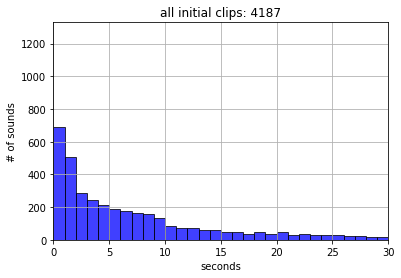

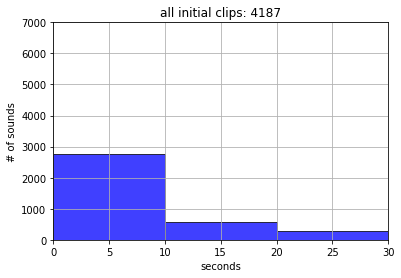

In [16]:
fig_title = 'all initial clips: ' + str(len(durations))

plot_histogram(durations,bins1,fig_title,axes1)
plot_histogram(durations,bins10,fig_title,axes10)

# PP

In [17]:
durations_PP = list()
# start_time = time.time()

#sounds_voted_PP = [v for v in nb_PP_per_cat_dev if v['value'] ==1.0]
sounds_voted_PP = [item for sublist in nb_PP_per_cat_dev for item in sublist]
sounds_voted_PP_counted_only_once = set(sounds_voted_PP)
sounds_voted_PP_more_than_once = set([id for id in sounds_voted_PP if sounds_voted_PP.count(id) > 1])

print ('sounds voted as PP counted only once: ' + str(len(sounds_voted_PP_counted_only_once)))
print ('sounds voted as PP more than once: ' + str(len(sounds_voted_PP_more_than_once)))
print ('annotations validated as PP: ' + str(len(sounds_voted_PP)))
print ('nothing is matching the paper, or between variables...')
print ()

sounds voted as PP counted only once: 2617
sounds voted as PP more than once: 1573
annotations validated as PP: 4265
nothing is matching the paper, or between variables...



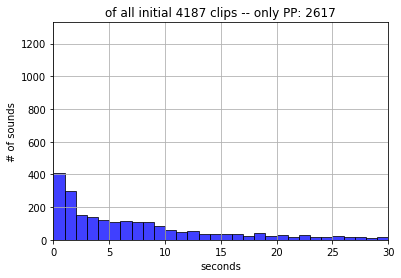

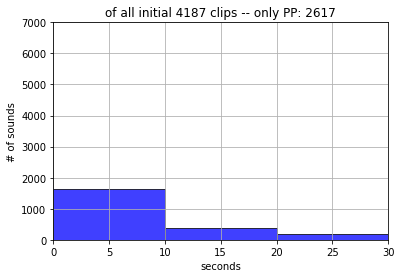

In [18]:
for id in all_domestic_ids:
    # is this sound voted as PP
    if id in sounds_voted_PP_counted_only_once:
        # get and append clip duration
        durations_PP.append(data_duration[str(id)]['duration'])

fig_title = 'of all initial ' + str(len(all_domestic_ids)) + ' clips -- only PP: ' + str(len(durations_PP))
plot_histogram(durations_PP,bins1,fig_title,axes1)
plot_histogram(durations_PP,bins10,fig_title,axes10)

# PNP

sounds voted as PNP counted only once: 737
sounds voted as PNP more than once: 254
annotations validated as PNP: 996
only 737 is matching the paper...



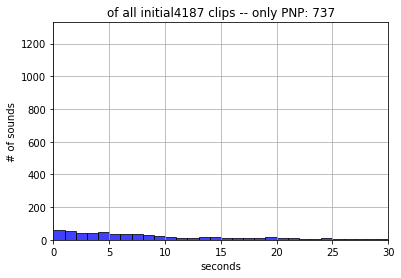

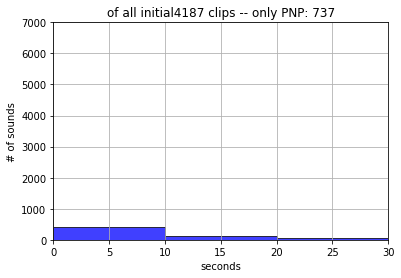

In [19]:
durations_PNP = list()
# start_time = time.time()

sounds_voted_PNP = [item for sublist in nb_PNP_per_cat_dev for item in sublist]
sounds_voted_PNP_counted_only_once = set(sounds_voted_PNP)
sounds_voted_PNP_more_than_once = set([id for id in sounds_voted_PNP if sounds_voted_PNP.count(id) > 1])

print ('sounds voted as PNP counted only once: ' + str(len(sounds_voted_PNP_counted_only_once)))
print ('sounds voted as PNP more than once: ' + str(len(sounds_voted_PNP_more_than_once)))
print ('annotations validated as PNP: ' + str(len(sounds_voted_PNP)))
print ('only '  + str(len(sounds_voted_PNP_counted_only_once)) + ' is matching the paper...')
print ()

for id in all_domestic_ids:
    # is this sound voted as PNP
    if id in sounds_voted_PNP_counted_only_once:
        # get and append clip duration
        durations_PNP.append(data_duration[str(id)]['duration'])


fig_title = 'of all initial' + str(len(all_domestic_ids)) + ' clips -- only PNP: ' + str(len(durations_PNP))
plot_histogram(durations_PNP,bins1,fig_title,axes1)
plot_histogram(durations_PNP,bins10,fig_title,axes10)

There are some NP and U

In [20]:
print ('sounds voted PP + sounds voted PNP should amount :' + str(len(durations)))
print ('sounds voted PP: ' + str(len(durations_PP)))
print ('sounds voted PNP: ' + str(len(durations_PNP)))
print ('sounds voted PP + sounds voted PNP: ' + str(len(durations_PP + durations_PNP)))

sounds voted PP + sounds voted PNP should amount :4187
sounds voted PP: 2617
sounds voted PNP: 737
sounds voted PP + sounds voted PNP: 3354


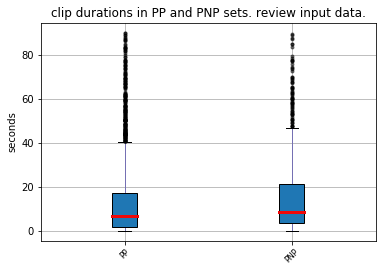

In [21]:
# ------------------- boxplot durations in PP / PNP
data = [durations_PP, durations_PNP]
x_labels = ['PP', 'PNP']
fig_title = 'clip durations in PP and PNP sets. review input data.'
y_label = 'seconds'
plot_boxplot(data,x_labels,fig_title,y_label)